# Image Iecovery - Filtering
- `Mean`: Recover image by filling of missing pixels(R,G,B) with the **mean** of adjacent nonmissing pixels(R,G,B).
- `Mediate`: Recover image by filling of missing pixels(R,G,B) with the **mediate** of adjacent nonmissing pixels(R,G,B).

## Motivation: Real-World Applications

### Graph in image

The nearby pixels are very similiar. Take the image of Lena as an example:

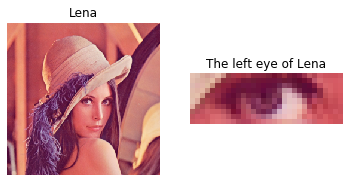

In [57]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

lena = imageio.imread('data/lena.bmp')

dim1, dim2, dim3 = lena.shape
a = int(dim1/2)
b = int(dim1/2) + 10
c = int(dim2/2) - 10
d = int(dim2/2) + 20

plt.subplot(1, 2, 1)
plt.imshow(lena)
plt.title('Lena')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lena[a:b, c:d, :])
plt.title('The left eye of Lena')
plt.axis('off')

plt.show()

> Figure 1: Lena and her left eye.

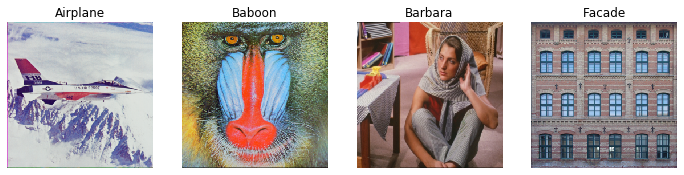

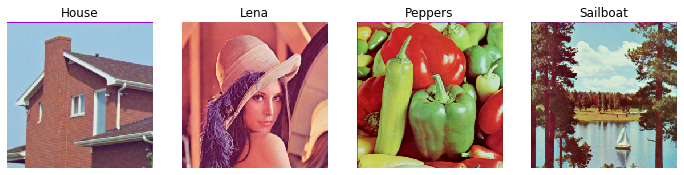

In [59]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

plt.subplots(1, 4, figsize = (12, 20))
plt.subplot(1, 4, 1)
plt.imshow(imageio.imread('data/airplane.bmp'))
plt.title('Airplane')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imageio.imread('data/baboon.bmp'))
plt.title('Baboon')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(imageio.imread('data/barbara.bmp'))
plt.title('Barbara')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(imageio.imread('data/facade.bmp'))
plt.title('Facade')
plt.axis('off')

plt.subplots(1, 4, figsize = (12, 20))
plt.subplot(1, 4, 1)
plt.imshow(imageio.imread('data/house.bmp'))
plt.title('House')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imageio.imread('data/lena.bmp'))
plt.title('Lena')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(imageio.imread('data/peppers.bmp'))
plt.title('Peppers')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(imageio.imread('data/sailboat.bmp'))
plt.title('Sailboat')
plt.axis('off')

plt.show()

## Image recovery by filtering

### Mean filter
Recover image by filling of missing pixels(R,G,B) with the **mean** of adjacent nonmissing pixels(R,G,B).

In [1]:
# from scipy.signal import convolve2d
import imageio
import numpy as np

In [2]:
name0 = ["lena"]
name = ["lena_rcmar"]
image = imageio.imread('data/{}.bmp'.format(name0[0]))
sparse_image = imageio.imread('data/{}.bmp'.format(name[0]))

In [3]:
r = 7
rig = np.int((r - 1) / 2)
position = np.where(sparse_image != 0)
image_rec = np.zeros(sparse_image.shape)
dim1, dim2, dim3 = sparse_image.shape
sparse_tensor = np.zeros((dim1 + r - 1, dim2 + r - 1, 3))
sparse_tensor[rig:dim1 + rig,rig:dim2 + rig,:] = sparse_image
for k in range(dim3):
    for i in range(rig, dim1 + rig):
        for j in range(rig, dim2 + rig):
            Madj = sparse_tensor[(i -  rig):(i + rig), (j - rig):(j + rig), k]
            Vadj = Madj[Madj!=0]
            image_rec[i - rig, j - rig, k] = np.mean(Vadj)
image_rec[position] = sparse_image[position]
image_rec = np.round(image_rec).astype(int)
image_rec[np.where(image_rec > 255)] = 255
image_rec[np.where(image_rec < 0)] = 0
pos = np.where((image != 0) & (sparse_image == 0))
rse = np.linalg.norm(image_rec[pos] - image[pos], 2) / np.linalg.norm(image[pos], 2)
imageio.imwrite('data/GLTC_Geman_{}.jpg'.format(name[0]), np.uint8(image_rec))
print(100 * rse)

11.152208165017672


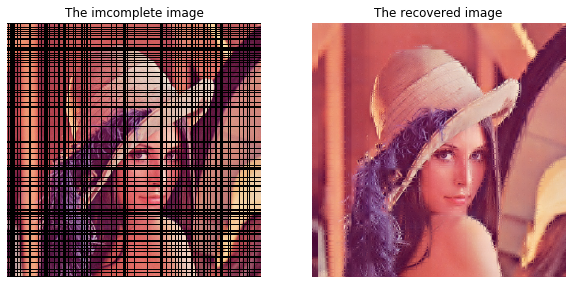

In [5]:
import matplotlib.pyplot as plt
plt.subplots(1, 2, figsize=(10, 15))
plt.subplot(1, 2, 1)
plt.imshow(sparse_image)
plt.title('The imcomplete image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_rec)
plt.title('The recovered image')
plt.axis('off')
plt.show()

## Median Filter
Recover image by filling of missing pixels(R,G,B) with the **mediate** of adjacent nonmissing pixels(R,G,B).

In [93]:
name0 = ["lena"]
name = ["lena_rcmar"]
image = imageio.imread('data/{}.bmp'.format(name0[0]))
sparse_image = imageio.imread('data/{}.bmp'.format(name[0]))

In [94]:
r = 7
rig = np.int((r - 1) / 2)
filter = np.ones((r,r)) / r ** 2
position = np.where(sparse_image != 0)
image_rec = np.zeros(sparse_image.shape)
dim1, dim2, dim3 = sparse_image.shape
sparse_tensor = np.zeros((dim1 + r - 1, dim2 + r - 1, 3))
sparse_tensor[rig:dim1 + rig,rig:dim2 + rig,:] = sparse_image
for k in range(dim3):
    for i in range(rig, dim1 + rig):
        for j in range(rig, dim2 + rig):
            Madj = sparse_tensor[(i -  rig):(i + rig), (j - rig):(j + rig), k]
            Vadj = Madj[Madj!=0]
            image_rec[i - rig, j - rig, k] = np.median(Vadj)
image_rec[position] = sparse_image[position]
image_rec = np.round(image_rec).astype(int)
image_rec[np.where(image_rec > 255)] = 255
image_rec[np.where(image_rec < 0)] = 0
pos = np.where((image != 0) & (sparse_image == 0))
rse = np.linalg.norm(image_rec[pos] - image[pos], 2) / np.linalg.norm(image[pos], 2)
imageio.imwrite('data/GLTC_Geman_{}.jpg'.format(name[0]), np.uint8(image_rec))
print(100 * rse)

11.152202921181937


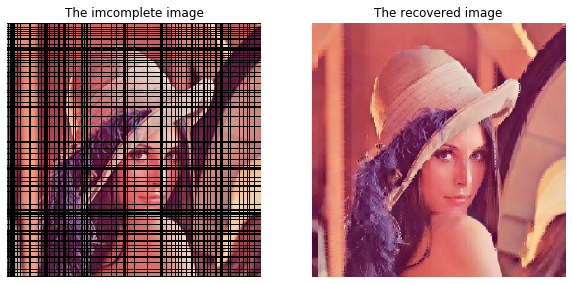

In [95]:
import matplotlib.pyplot as plt
plt.subplots(1, 2, figsize=(10, 15))
plt.subplot(1, 2, 1)
plt.imshow(sparse_image)
plt.title('The imcomplete image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_rec)
plt.title('The recovered image')
plt.axis('off')
plt.show()

## Integrate image filtering funtion

In [7]:
def imgfiltering(sparse_image, filtype = 'mean', sz = 5):
    r = sz
    rig = np.int((r - 1) / 2)
    filter = np.ones((r,r)) / r ** 2
    position = np.where(sparse_image != 0)
    image_rec = np.zeros(sparse_image.shape)
    dim1, dim2, dim3 = sparse_image.shape
    sparse_tensor = np.zeros((dim1 + r - 1, dim2 + r - 1, 3))
    sparse_tensor[rig:dim1 + rig,rig:dim2 + rig,:] = sparse_image
    for k in range(dim3):
        for i in range(rig, dim1 + rig):
            for j in range(rig, dim2 + rig):
                Madj = sparse_tensor[(i -  rig):(i + rig), (j - rig):(j + rig), k]
                Vadj = Madj[Madj!=0]
                if filtype == 'meadian':
                    image_rec[i - rig, j - rig, k] = np.median(Vadj)
                elif filtype == 'mean':
                    image_rec[i - rig, j - rig, k] = np.mean(Vadj)
    image_rec[position] = sparse_image[position]
    image_rec = np.round(image_rec).astype(int)
    image_rec[np.where(image_rec > 255)] = 255
    image_rec[np.where(image_rec < 0)] = 0
    return image_rec

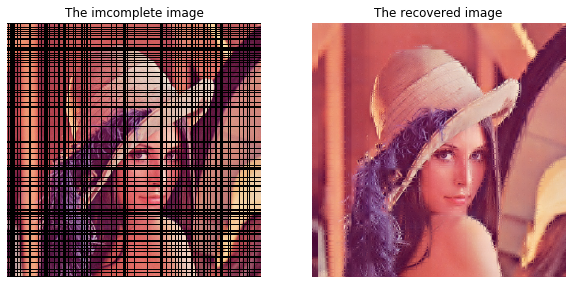

In [10]:
plt.subplots(1, 2, figsize=(10, 15))
plt.subplot(1, 2, 1)
plt.imshow(sparse_image)
plt.title('The imcomplete image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgfiltering(sparse_image, filtype = 'mean', sz = 7))
plt.title('The recovered image')
plt.axis('off')
plt.show()

### Table 1-1: **Experiment results** (RSE performance) of image inpainting for `lena` using Filter:

|  Filter   |      MAR      |     R-MAR      |   C-MAR   |     RC-MAR     |
|:-----------------------|--------------:|---------------:|----------:|---------------:|
|**Mean**  |     8.77      |       12.48     |   14.69   |      11.15      |
|**Median**|     9.31      |      11.43     |   14.34   |      11.52      |

- Parameter setting:

 - MAR: `r` = 5.
 - RMAR / CMAR: `r` = 11.
 - RCMAR: `r` = 7.

### Whole Performance

We choose the images of `lena` and `peppers` for evaluation.

#### MAR (Missing at random)

In [11]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
filterType = 'mean'
filterSize = 5

im = ["lena", "peppers"]
result = np.zeros((len(im), 3, 50))
for ima in range(len(im)):
    image = imageio.imread('data/{}.bmp'.format(im[ima]))
    dim1, dim2, dim3 = image.shape
    for missing in range(result.shape[1]):
        for it in range(result.shape[2]):
            rate = 0.1 * (2 * missing + 3) # Set missing rate
            mask = np.round(np.random.rand(dim1, dim2) + 0.5 - rate)  # Generate a binary mask.
            sparse_image = image.copy()
            for k in range(dim3):
                sparse_image[:, :, k] = np.multiply(image[:, :, k], mask) # Generate incomplete image
            image_rec = imgfiltering(sparse_image, filterType, filterSize)
            pos = np.where((image != 0) & (sparse_image == 0))
            rse = np.linalg.norm(image_rec[pos] - image[pos], 2) / np.linalg.norm(image[pos], 2)
            result[ima, missing, it] = rse
        print('Image: %s' % (im[ima]))
        print('Missing rate: {:.2}'.format(0.1 * (2 * missing + 3)))
        print()

Image: lena
Missing rate: 0.3

Image: lena
Missing rate: 0.5

Image: lena
Missing rate: 0.7

Image: peppers
Missing rate: 0.3

Image: peppers
Missing rate: 0.5

Image: peppers
Missing rate: 0.7



In [12]:
error = np.zeros((len(im), result.shape[1]))
std = np.zeros((len(im), result.shape[1]))
for ima in range(len(im)):
    for missing in range(result.shape[1]):
        error[ima, missing] = np.mean(100 * result[ima, missing, :])
        std[ima, missing] = np.std(100 * result[ima, missing, :])
print(error)
print()
print(std)
print()

[[ 8.63891647  8.96715113 12.26844697]
 [10.22987132 10.70460145 13.88754221]]

[[0.09979512 0.10358558 0.25897965]
 [0.11873695 0.10734911 0.25855882]]



#### R-MAR (Row-wise missing at random)

In [13]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
filterType = 'mean'
filterSize = 7

im = ["lena", "peppers"]
result = np.zeros((len(im), 3, 50))
for ima in range(len(im)):
    image = imageio.imread('data/{}.bmp'.format(im[ima]))
    dim1, dim2, dim3 = image.shape
    for missing in range(result.shape[1]):
        for it in range(result.shape[2]):
            rate = 0.1 * (2 * missing + 3) # Set missing rate
            mask_row = np.round(np.random.rand(dim1) + 0.5 - rate)
            image0 = image.copy()
            for i in range(dim2):
                for j in range(dim3):
                    image0[:, i, j] = np.multiply(image[:, i, j], mask_row)
            sparse_image = image0.copy() # Generate incomplete image
            image_rec = imgfiltering(sparse_image, filterType, filterSize)
            pos = np.where((image != 0) & (sparse_image == 0))
            rse = np.linalg.norm(image_rec[pos] - image[pos], 2) / np.linalg.norm(image[pos], 2)
            result[ima, missing, it] = rse
        print('Image: %s' % (im[ima]))
        print('Missing rate: {:.2}'.format(0.1 * (2 * missing + 3)))
        print()

Image: lena
Missing rate: 0.3

Image: lena
Missing rate: 0.5

Image: lena
Missing rate: 0.7

Image: peppers
Missing rate: 0.3

Image: peppers
Missing rate: 0.5

Image: peppers
Missing rate: 0.7



In [14]:
error = np.zeros((len(im), result.shape[1]))
std = np.zeros((len(im), result.shape[1]))
for ima in range(len(im)):
    for missing in range(result.shape[1]):
        error[ima, missing] = np.mean(100 * result[ima, missing, :])
        std[ima, missing] = np.std(100 * result[ima, missing, :])
print(error)
print()
print(std)
print()

[[10.82779887 20.93692689 43.47694643]
 [13.51815902 22.14338927 42.04824601]]

[[2.00296946 5.6287829  5.73886715]
 [2.55995298 5.21781341 7.11055009]]



#### C-MAR (Column-wise missing at random)

In [15]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
filterType = 'mean'
filterSize = 7

im = ["lena", "peppers"]
result = np.zeros((len(im), 3, 50))
for ima in range(len(im)):
    image = imageio.imread('data/{}.bmp'.format(im[ima]))
    dim1, dim2, dim3 = image.shape
    for missing in range(result.shape[1]):
        for it in range(result.shape[2]):
            rate = 0.1 * (2 * missing + 3) # Set missing rate
            mask_column = np.round(np.random.rand(dim2) + 0.5 - rate)
            image0 = image.copy()
            for i in range(dim1):
                for j in range(dim3):
                    image0[i, :, j] = np.multiply(image[i, :, j], mask_column)
            sparse_image = image0.copy() # Generate incomplete image
            image_rec = imgfiltering(sparse_image, filterType, filterSize)
            pos = np.where((image != 0) & (sparse_image == 0))
            rse = np.linalg.norm(image_rec[pos] - image[pos], 2) / np.linalg.norm(image[pos], 2)
            result[ima, missing, it] = rse
        print('Image: %s' % (im[ima]))
        print('Missing rate: {:.2}'.format(0.1 * (2 * missing + 3)))
        print()

Image: lena
Missing rate: 0.3

Image: lena
Missing rate: 0.5

Image: lena
Missing rate: 0.7

Image: peppers
Missing rate: 0.3

Image: peppers
Missing rate: 0.5

Image: peppers
Missing rate: 0.7



In [16]:
error = np.zeros((len(im), result.shape[1]))
std = np.zeros((len(im), result.shape[1]))
for ima in range(len(im)):
    for missing in range(result.shape[1]):
        error[ima, missing] = np.mean(100 * result[ima, missing, :])
        std[ima, missing] = np.std(100 * result[ima, missing, :])
print(error)
print()
print(std)
print()

[[12.36974017 21.64938258 43.01380227]
 [14.22558386 21.70525276 42.61442513]]

[[2.7624974  5.23012834 5.95838264]
 [2.101192   5.12001239 5.72524114]]



#### RC-MAR ((Row, column)-wise missing at random)

In [17]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
filterType = 'mean'
filterSize = 7

im = ["lena", "peppers"]
result = np.zeros((len(im), 3, 50))
for ima in range(len(im)):
    image = imageio.imread('data/{}.bmp'.format(im[ima]))
    dim1, dim2, dim3 = image.shape
    for missing in range(result.shape[1]):
        for it in range(result.shape[2]):
            rate = 0.1 * (2 * missing + 3) # Set missing rate
            mask_row = np.round(np.random.rand(dim1) + 0.5 - (1 - np.sqrt(1 - rate)))
            mask_column = np.round(np.random.rand(dim2) + 0.5 - (1 - np.sqrt(1 - rate)))
            image0 = image.copy()
            for i in range(dim2):
                for j in range(dim3):
                    image0[:, i, j] = np.multiply(image[:, i, j], mask_row)
            sparse_image = image0.copy() # Generate incomplete image
            for i in range(dim1):
                for j in range(dim3):
                    sparse_image[i, :, j] = np.multiply(image0[i, :, j], mask_column)
            image_rec = imgfiltering(sparse_image, filterType, filterSize)
            pos = np.where((image != 0) & (sparse_image == 0))
            rse = np.linalg.norm(image_rec[pos] - image[pos], 2) / np.linalg.norm(image[pos], 2)
            result[ima, missing, it] = rse
        print('Image: %s' % (im[ima]))
        print('Missing rate: {:.2}'.format(0.1 * (2 * missing + 3)))
        print()

Image: lena
Missing rate: 0.3

Image: lena
Missing rate: 0.5

Image: lena
Missing rate: 0.7

Image: peppers
Missing rate: 0.3

Image: peppers
Missing rate: 0.5

Image: peppers
Missing rate: 0.7



In [18]:
error = np.zeros((len(im), result.shape[1]))
std = np.zeros((len(im), result.shape[1]))
for ima in range(len(im)):
    for missing in range(result.shape[1]):
        error[ima, missing] = np.mean(100 * result[ima, missing, :])
        std[ima, missing] = np.std(100 * result[ima, missing, :])
print(error)
print()
print(std)
print()

[[10.35809724 11.89122377 19.81446856]
 [13.03458947 14.03368802 21.025521  ]]

[[0.37026737 2.5773875  3.9591617 ]
 [0.75282625 1.47617345 4.7813773 ]]



Table 1-2: **Experiment results** (RSE performance) of image inpainting on two color images using Mean Filter(filling missing RGBs with mean of non-missing adjacent RGBs):

|    -      | Scenario  |      MAR       |     R-MAR      |      C-MAR     |     RC-MAR     |
|:----------|:----------|---------------:|---------------:|---------------:|---------------:|
|  **Lena** | **30%**   | 8.64 $\pm$ 0.10|10.83 $\pm$ 2.00|12.37 $\pm$ 2.76|10.36 $\pm$ 0.37|
|       -   | **50%**   | 8.97 $\pm$ 0.10|20.94 $\pm$ 5.63|21.65 $\pm$ 5.23|11.89 $\pm$ 2.58|
|       -   | **70%**   |12.27 $\pm$ 0.26|43.48 $\pm$ 5.74|43.01 $\pm$ 5.96|19.81 $\pm$ 3.96|
|**Peppers**| **30%**   |10.23 $\pm$ 0.12|13.52 $\pm$ 2.56|14.23 $\pm$ 2.10|13.03 $\pm$ 0.75|
|       -   | **50%**   |10.70 $\pm$ 0.11|22.14 $\pm$ 5.22|21.71 $\pm$ 5.12|14.03 $\pm$ 1.47|
|       -   | **70%**   |13.89 $\pm$ 0.26|42.05 $\pm$ 7.11|42.62 $\pm$ 5.73|21.03 $\pm$ 4.78|